# Model

<a href="https://huggingface.co/google/gemma-2-2b-it">google/gemma-2-2b-it</a>

This notebook should just contain code examples and a base working training model, once a basic working model is built we will freeze any work on this model, it will become my local reference.

# Raw Material Locations, anything that has not had significant updates will not be includes

### Stage 1 - Easy things to grab

- Intel Github https://github.com/intel
  - Items to be processed
  - https://github.com/intel/ipex-llm
  - https://github.com/intel/intel-extension-for-pytorch
  - https://github.com/intel/ai
  - So the great thing about having all these in github is we can simply clone all this data, and since its written in markdown it will be easily converted into a Q/A format by another LLM.
- Arc B580 press release slides
  - https://download.intel.com/newsroom/2024/client-computing/Intel-Arc-B580-B570-Media-Deck.pdf
  - https://cdrdv2-public.intel.com/839907/Intel%20Arc%20B-Series%20Graphics%20Quick%20Reference%20Guide%20V1.1.pdf
- My own instructions
  - https://github.com/phillipscarroll/ml-xpu/blob/main/native_win11_intel_arc_xpu_pytorch-amp.md

# Human Created Questions and Answers



- list out any known but not found in documentation tribal information
  - We could add detail around overclocking, the differences in drivers and software after battlemage release
  - The fact people think ARC means Alchemist, looking at you TechYesCity

# CSV Domain Specific Questions and Answers

- Gather all the data, place into PDF or similar form
- Use another larger model like DeepSeek-R1 14B, Gemma-2-9B, Llama 3 70B etc... to read these documents and provide you a Q/A csv output
- We have 48GB VRAM available so there are options, if you don't that is ok this is something that could run overnight with a large model on cpu with system ram. Even then a smaller model that could run on an 8GB gpu maybe accurate enough to provide a good output. It may benefit to try smaller models just to provide variance in the output.
- You may need to farm the same doc from multiple models as we need to get at least 10000 questions and answer to steer the model and prevent overfitting
- I'm not sure if it would be better to farm multiple models once and create a large list, at some point we may run into token limits. I think that makes sense, farm large amounts of small documents many times then just stitch together on the backend.

# CSV Example

In [ ]:
question,answer
"What is a tensor?","A tensor is a multi-dimensional array used in machine learning and deep learning."
"How does oneAPI optimize matrix multiplication?","oneAPI uses Intel’s DPC++ to enable vectorization and memory-efficient execution."
"What is mixed precision training?","Mixed precision training uses both FP32 and FP16 to reduce memory usage and improve training speed."

I created a 10000 line test csv to tune ram/vram first before I put time into sanitizing real data. 

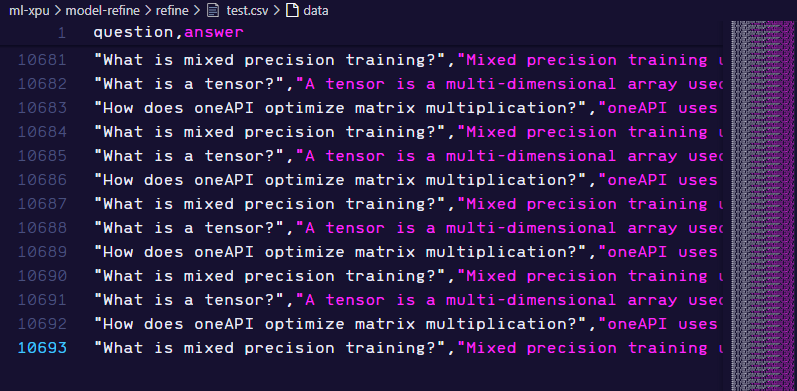

# CSV Ingest Example

In [ ]:
import pandas as pd

df = pd.read_csv("dataset.csv")
print(df.head())  # Check data

# Code Examples From Gemma 2

In [ ]:
# Using an upscaled FP32 precision

# pip install accelerate
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-2b-it")
model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-2-2b-it",
    device_map="auto",
)

input_text = "Write me a poem about Machine Learning."
input_ids = tokenizer(input_text, return_tensors="pt").to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=32)
print(tokenizer.decode(outputs[0]))


In [ ]:
# Using 16-bit BF16 precision

# pip install accelerate
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-2b-it")
model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-2-2b-it",
    device_map="auto",
    torch_dtype=torch.bfloat16,
)

input_text = "Write me a poem about Machine Learning."
input_ids = tokenizer(input_text, return_tensors="pt").to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=32)
print(tokenizer.decode(outputs[0]))


In [ ]:
# Using 8-bit precision

# pip install bitsandbytes accelerate
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(load_in_8bit=True)

tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-2b-it")
model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-2-2b-it",
    quantization_config=quantization_config,
)

input_text = "Write me a poem about Machine Learning."
input_ids = tokenizer(input_text, return_tensors="pt").to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=32)
print(tokenizer.decode(outputs[0]))

In [ ]:
# Using 4-bit precision

# pip install bitsandbytes accelerate
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(load_in_4bit=True)

tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-2b-it")
model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-2-2b-it",
    quantization_config=quantization_config,
)

input_text = "Write me a poem about Machine Learning."
input_ids = tokenizer(input_text, return_tensors="pt").to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=32)
print(tokenizer.decode(outputs[0]))